# Exploratory Data Analysis

Notebook getting to grips with the shape and quality of the data and the features available.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Start by looking at the Covid cases
df = pd.read_csv('../data/cases.csv')

In [7]:
df.head()

,case_id,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
0,1,NaN,2/27/2020,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
1,2,NaN,03/09/2020,NaN,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
2,3,NaN,3/16/2020,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
3,4,NaN,3/16/2020,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
4,5,NaN,3/16/2020,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN


In [5]:
df.describe(include='all')

,case_id,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
count,6401.000000,0.0,6401,10,12,16,6401,6401,381,6401,384,1,4,27,4,15,32,1,39,2
unique,NaN,NaN,64,10,3,6,35,1,5,42,3,1,4,7,3,4,7,1,17,2
top,NaN,NaN,05/08/2020,43,Male,FCT,Lagos,Nigeria,Receiving Treatment,https://twitter.com/NCDCgov/status/12614279842...,Mild to moderate,03/09/2020,3/22/2020,3/21/2020,No,3/14/2020-3/21/2020,High risk country,3/23/2020,Returned from overseas travel,https://twitter.com/NCDCgov/status/12610693001...
freq,NaN,NaN,386,1,6,8,2756,6401,376,464,382,1,1,10,2,11,20,1,21,1
mean,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1847.953868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1601.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4801.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's go through the featues one by one. The case_id looks to be unique, whilst the origin_case_id doesn't seem to be providing any useful data. 

In [9]:
df['origin_case_id'].unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6396   NaN
6397   NaN
6398   NaN
6399   NaN
6400   NaN
Name: origin_case_id, Length: 6401, dtype: float64>

There all NaN so can drop this column. 

In [11]:
df.drop('origin_case_id', axis=1, inplace=True)

In [17]:
df['date'].isna().sum()

0

In [24]:
df.dtypes['date']

dtype('O')

So there's no null dates which is good, but they're saved as objects which is not so good. Let's convert them to dates. 

In [29]:
df['date'].sort_values()

1       03/09/2020
143     04/01/2020
159     04/01/2020
160     04/01/2020
161     04/01/2020
           ...    
1796     4/30/2020
1797     4/30/2020
1798     4/30/2020
1788     4/30/2020
1928     4/30/2020
Name: date, Length: 6401, dtype: object

In [39]:
pd.to_datetime(df['date']).describe()

/opt/anaconda3/envs/hackathon/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6401
unique                     64
top       2020-05-08 00:00:00
freq                      386
first     2020-02-27 00:00:00
last      2020-05-19 00:00:00
Name: date, dtype: object

In [40]:
# That looks correct now so save it to the df
df['date'] = pd.to_datetime(df['date'])

In [41]:
df.head()

,case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
0,1,2020-02-27,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
1,2,2020-03-09,NaN,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
2,3,2020-03-16,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
3,4,2020-03-16,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
4,5,2020-03-16,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN


Let's look at the age now

In [42]:
df['age'].describe()

count     10
unique    10
top       43
freq       1
Name: age, dtype: object

In [47]:
# Those values look a bit off, a max age of 43 is way too low. Let's reinterpret it as an integer
df['age'].unique()

array(['44', nan, '30', '58', '38', '6 weeks', '59', '29', '23', '43',
       '67'], dtype=object)

In [52]:
# Those ages look a bit sparse, we'll tidy up the '6 weeks' and convert it anyway
df['age'] = df['age'].replace('6 weeks', '0')

In [53]:
df['age'].unique()

array(['44', nan, '30', '58', '38', 0, '59', '29', '23', '43', '67'],
      dtype=object)

In [55]:
df['age'] = df['age'].fillna(0).astype('int')

In [57]:
df.head()

,case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
0,1,2020-02-27,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
1,2,2020-03-09,0,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
2,3,2020-03-16,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
3,4,2020-03-16,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
4,5,2020-03-16,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN


In [58]:
# Gender
df['gender'].unique()

array(['Male', nan, 'Female', 'Suleja'], dtype=object)

In [76]:
# Suleja is a city in Nigeria, think this has been placed in the wrong column
df.loc[df['gender'] == 'Suleja','city'] = 'Suleja'
df.loc[df['gender'] == 'Suleja','gender'] = np.nan

In [78]:
df['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [80]:
df['gender'] = df['gender'].astype('string')

In [81]:
df['gender'].value_counts()

Male      6
Female    5
Name: gender, dtype: Int64

So the gender column is fixed, but is actually a bit sparse on data. What about the locations

In [83]:
df['city'].unique()

array(['Ogun', 'Lagos', nan, 'Lekki', 'FCT', 'Ibadan', 'Bauchi', 'Suleja'],
      dtype=object)

In [84]:
df['city'].value_counts()

FCT       8
Lagos     2
Lekki     2
Ogun      2
Ibadan    1
Bauchi    1
Suleja    1
Name: city, dtype: int64

In [85]:
df['province/state'].unique()

array(['Ogun', 'Lagos', 'Ekiti', 'Abuja', 'Oyo', 'Edo', 'Bauchi', 'Osun',
       'Rivers', 'Enugu', 'Benue', 'Kaduna', 'Akwa Ibom', 'Ondo', 'Kwara',
       'Delta', 'Katsina', 'Anambra', 'Niger', 'Kano', 'Jigawa', 'Borno',
       'Gombe', 'Abia', 'Sokoto', 'Adamawa', 'Plateau', 'Zamfara', 'Imo',
       'Taraba', 'Bayelsa', 'Ebonyi', 'Kebbi', 'Nasarawa', 'Yobe'],
      dtype=object)

In [86]:
df['province/state'].value_counts()

Lagos        2756
Kano          842
Abuja         427
Katsina       281
Borno         227
Bauchi        224
Jigawa        205
Ogun          177
Kaduna        152
Oyo           143
Gombe         136
Edo           119
Sokoto        113
Zamfara        84
Kwara          65
Rivers         53
Plateau        50
Osun           42
Nasarawa       34
Yobe           32
Kebbi          32
Delta          27
Adamawa        26
Niger          22
Ondo           20
Ekiti          19
Akwa Ibom      18
Taraba         17
Enugu          16
Ebonyi         13
Bayelsa         7
Imo             7
Abia            5
Anambra         5
Benue           5
Name: province/state, dtype: int64

In [88]:
df['country'].unique

<bound method Series.unique of 0       Nigeria
1       Nigeria
2       Nigeria
3       Nigeria
4       Nigeria
         ...   
6396    Nigeria
6397    Nigeria
6398    Nigeria
6399    Nigeria
6400    Nigeria
Name: country, Length: 6401, dtype: object>

In [91]:
df['country'].astype('string').value_counts()

Nigeria    6401
Name: country, dtype: Int64

Location data looks good at the state/province level. We'll drop the country column as it doesn't add much

In [93]:
df.drop('country', axis=1, inplace=True)

In [111]:
df.head()

,case_id,date,age,gender,city,province/state,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
0,1,2020-02-27,44,Male,Ogun,Ogun,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
1,2,2020-03-09,0,<NA>,Ogun,Ogun,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
2,3,2020-03-16,30,Female,Lagos,Lagos,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
3,4,2020-03-16,58,Male,Lagos,Lagos,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
4,5,2020-03-16,38,Female,NaN,Ekiti,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN


In [112]:
df['current_status'].unique()

array(['In recovery', 'In treatment', 'Clinically Stable', nan,
       'Deceased', 'Receiving Treatment'], dtype=object)

Current status seems reasonable, should check all deceased have a death date and vice versa.

In [114]:
df[df['current_status'] == 'Deceased']

,case_id,date,age,gender,city,province/state,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
26,27,2020-03-22,67,Male,FCT,Abuja,Deceased,https://twitter.com/NCDCgov/status/12416692553...,Severe,NaN,3/22/2020,3/22/2020,"Diabetes, Myeloma.",3/19/2020,UK,3/23/2020,Returned from travel to the UK. Showed symptom...,NaN
288,289,2020-04-09,0,<NA>,NaN,Delta,Deceased,http://covid19.ncdc.gov.ng/,Mild to moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Case ID 289 barely has any data other than mild to moderate symptoms and deceased. Think it might be worth dropping. 

In [116]:
df.drop(288, inplace=True)

In [117]:
df[df['current_status'] == 'Deceased']

,case_id,date,age,gender,city,province/state,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
26,27,2020-03-22,67,Male,FCT,Abuja,Deceased,https://twitter.com/NCDCgov/status/12416692553...,Severe,NaN,3/22/2020,3/22/2020,"Diabetes, Myeloma.",3/19/2020,UK,3/23/2020,Returned from travel to the UK. Showed symptom...,NaN


In [121]:
df['death_date'].unique()

array([nan, '3/23/2020'], dtype=object)

Looks like either there weren't many deaths or they haven;t been recorded correctly 


In [122]:
df['underlying_conditions'].unique()

array(['No', nan, 'Diabetes, Myeloma. ',
       '2 cases were repeated as reported in 2/5/2020 (hence were lessed here)'],
      dtype=object)

In [123]:
df['underlying_conditions'].value_counts()

No                                                                        2
Diabetes, Myeloma.                                                        1
2 cases were repeated as reported in 2/5/2020 (hence were lessed here)    1
Name: underlying_conditions, dtype: int64

Looks like underlying conditions doesn't really add much.

In [124]:
df['travel_history_dates'].unique()

array([nan, '13-Mar-20', '3/14/2020-3/21/2020', '3/14/2020-3/21/2021',
       '3/19/2020'], dtype=object)

In [125]:
df['travel_history_dates'].value_counts()

3/14/2020-3/21/2020    11
13-Mar-20               2
3/14/2020-3/21/2021     1
3/19/2020               1
Name: travel_history_dates, dtype: int64

In [126]:
df['travel_history_location'].value_counts()

High risk country    20
UK                    4
USA                   4
Germany               1
Italy                 1
United Kingdom        1
France                1
Name: travel_history_location, dtype: int64

We'll leave the travel history for now, but maybe useful later. 

In [127]:
df['notes_for_discussion'].value_counts()

Returned from overseas travel                                                                                                                           21
Patient returned from travel to USA                                                                                                                      3
Patient came in from Italy.                                                                                                                              1
Patient returned from trip to UK and was in 14 day self isolation, developed symptoms and went to the Infectious Disease Hospital, Lagos for testing     1
Close contact of a confirmed case. This patient has no travel history of recent                                                                          1
Returned from France 3/14/2020                                                                                                                           1
2 Cases were repeat as reported on 14th May 2020                      

Looks like if necessary we could infer some travel data from the notes for discussion.

In [129]:
df['Unnamed: 19'].value_counts()

https://twitter.com/NCDCgov/status/1261069300108058626    1
https://twitter.com/NCDCgov/status/1261430965043331072    1
Name: Unnamed: 19, dtype: int64

In [138]:
df[df['Unnamed: 19'] == 'https://twitter.com/NCDCgov/status/1261069300108058626' ]

,case_id,date,age,gender,city,province/state,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
4942,4943,2020-05-13,0,<NA>,NaN,Kaduna,NaN,https://twitter.com/NCDCgov/status/12606986188...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Cases were repeat as reported on 14th May 2020,https://twitter.com/NCDCgov/status/12610693001...


In [139]:
df[df['Unnamed: 19'] == 'https://twitter.com/NCDCgov/status/1261430965043331072' ]

,case_id,date,age,gender,city,province/state,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
1269,1270,2020-04-26,0,<NA>,NaN,Bayelsa,NaN,https://twitter.com/NCDCgov/status/12545490110...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Akwa Ibom case was repeat as reported on the...,https://twitter.com/NCDCgov/status/12614309650...


In [133]:
df[df['Unnamed: 19'] == 'https://twitter.com/NCDCgov/status/1261069300108058626']['source']

4942    https://twitter.com/NCDCgov/status/12606986188...
Name: source, dtype: object

In [135]:
df[df['Unnamed: 19'] == 'https://twitter.com/NCDCgov/status/1261430965043331072']['source']

1269    https://twitter.com/NCDCgov/status/12545490110...
Name: source, dtype: object

The unnamed column only contains 2 extra sources - which maybe correct as the source in the original data is dead. We may as well replace the source with the unnamed column for the 2 values that are present, then drop the column.

In [142]:
df.loc[df['Unnamed: 19'] == 'https://twitter.com/NCDCgov/status/1261069300108058626', 'source'] = 'https://twitter.com/NCDCgov/status/1261069300108058626'
df.loc[df['Unnamed: 19'] == 'https://twitter.com/NCDCgov/status/1261430965043331072', 'source'] = 'https://twitter.com/NCDCgov/status/1261430965043331072'
df.drop('Unnamed: 19', axis=1, inplace=True)

## Visualisations

Here we explore some basic visualisations

<AxesSubplot:xlabel='date'>

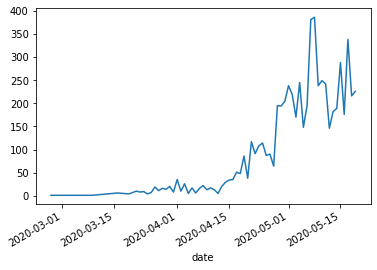

In [143]:
df.groupby(df['date']).size().plot()